# Restaurants in Chennai EDA

Chennai has a long culinary history, well known across the world for it's filter coffees to chicken 65 and also featured 2nd place in National Geographic's top 10 food cities list in 2015. This project aims to explore this renowned restaurant space of Chennai, inorder to gain interesting insights. This carried out with the aid of a Kaggle dataset, collected from Zomato's API.
<br>
<br>
    Dataset contains the information of restaurants listed on zomato across the country. It provides detailed information such as locality, restaurant type, price range, rating and cuisines, on each restaurant. For our analysis only restaurants from Chennai are considered.

In [1]:
# libraries for data wrangling and visualisation are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato = pd.read_csv('../input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv')
zomato.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


# Data Cleaning

**Redundant Columns:**

Preliminary examination of the features makes us conclude that there are number of columns with redundant information for the exploratory data analysis. They include restaurant id, city id, country id, zipcode, url, locality verbose, currency, timings and rating text. At the same time, delivery, takeaway and opentable support didnot have useful information in it.
Hence those columns are dropped.

In [3]:
zomato.drop(['res_id','address','city_id','country_id',
             'zipcode','url','latitude','longitude','locality_verbose',
             'currency','opentable_support','delivery','takeaway','timings','rating_text'],axis=1,inplace=True)
zomato.columns

Index(['name', 'establishment', 'city', 'locality', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'votes', 'photo_count'],
      dtype='object')

In [4]:
print('No. of features:',zomato.shape[1],'\nNo. of resturants:',zomato.shape[0])

No. of features: 11 
No. of resturants: 211944


**Duplicates:**

In [5]:
print('No.of duplicate entries:',zomato[zomato.duplicated()].count()[0])
zomato.drop_duplicates(inplace=True)
print('After removal:\nNo. of features:',zomato.shape[1],'\nNo. of resturants:',zomato.shape[0])

No.of duplicate entries: 156014
After removal:
No. of features: 11 
No. of resturants: 55930


**Missing Values Treatment:**

In [6]:
zomato.isnull().sum()

name                      0
establishment             0
city                      0
locality                  0
cuisines                468
average_cost_for_two      0
price_range               0
highlights                0
aggregate_rating          0
votes                     0
photo_count               0
dtype: int64

In [7]:
zomato.cuisines.fillna('NA',inplace=True)
zomato.cuisines = zomato.cuisines.apply(lambda x : x.split(sep=','))
zomato['establishment'] = zomato.establishment.apply(lambda x : 'NA' if x=='[]' else x[2:-2])

Data has missing value explicitly only in cuisines, whereas missing value is in form of [ ] in establishment. Both of them are filled with 'NA' and both the columns are cleaned to ease further analysis.

In [8]:
zch = zomato[zomato['city'] == 'Chennai']
print('No. of resturants in Chennai:',zch.shape[0])

No. of resturants in Chennai: 1891


# Distribution

In order to understand the distribution of restaurants in the city, data is grouped by restaurant type, locality, price range and rating and plots are visualised.

**Restaurant Type:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

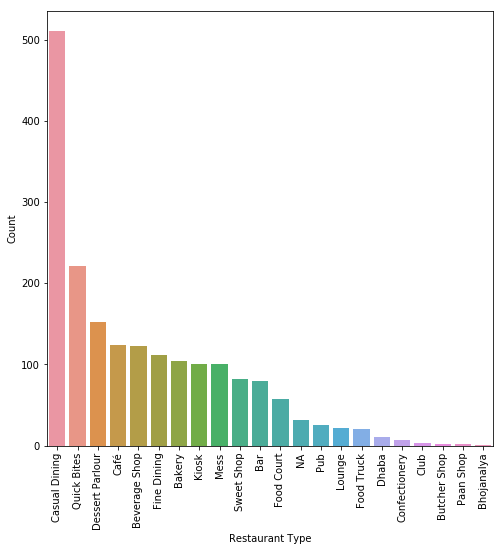

In [9]:
rd_type = zch.establishment.value_counts().reset_index().set_index('index')
plt.figure(figsize=(8,8))
sns.barplot(x=rd_type.index,y=rd_type.establishment)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

* More than a quarter of all restaurants are labelled as casual dining, which is followed by quick bites. 
* All other major types of restaurants such as cafe, dessert parlour, fine dining, etc have almost equal in number in the city.

**Location:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

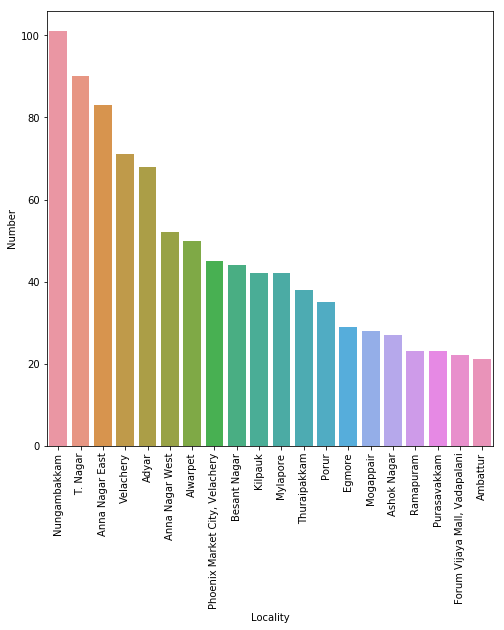

In [10]:
rd_loc = zch.locality.value_counts().head(20).reset_index().set_index('index') 
plt.figure(figsize=(8,8))
sns.barplot(x=rd_loc.index,y=rd_loc.locality)
plt.xlabel('Locality')
plt.ylabel('Number')
plt.xticks(rotation='vertical')

* Top 20 localities in Chennai by number of restaurants in plotted above. Nungambakkam seems to be restaurant hub of the city, closely followed by T. Nagar and Anna Nagar East. 
<br>
<br>
Does these top localities have the share the same restaurant profile? We would take a look at that question a little later.

**Price range:**

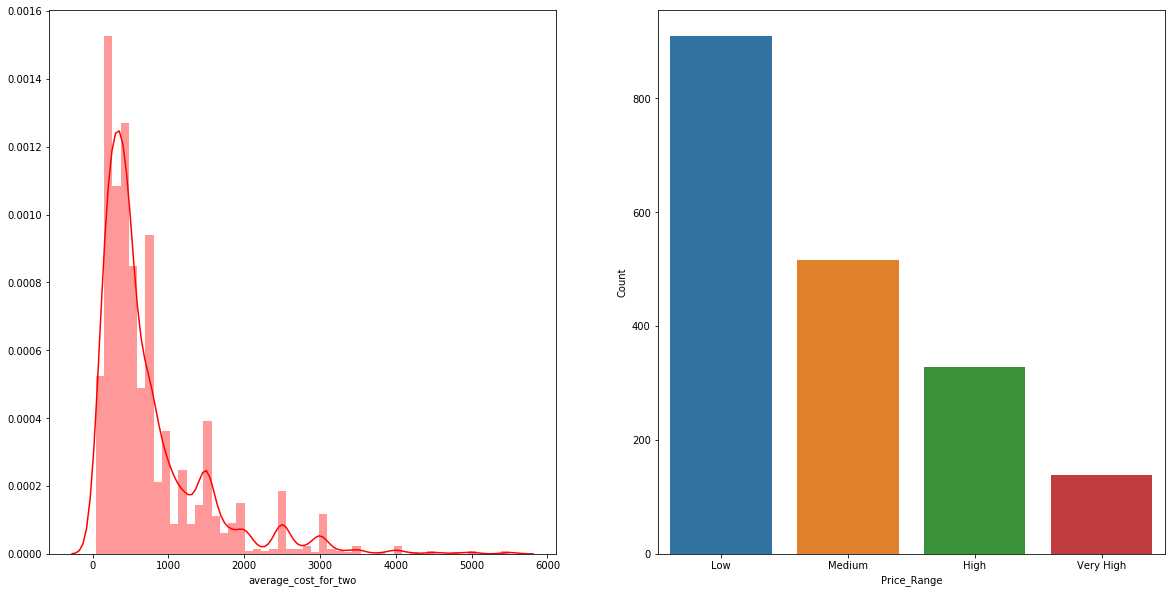

In [11]:
rd_pr = zch.price_range.value_counts().reset_index().set_index('index') 
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=rd_pr.index,y=rd_pr.price_range,ax=ax[1])
plt.xlabel('Price_Range')
plt.xticks(ticks=(0,1,2,3),labels=('Low','Medium','High','Very High'))
plt.ylabel('Count')
sns.distplot(zch.average_cost_for_two,ax=ax[0],color='r')

* Price Range(₹):
    * 1-Low : 200-450
    * 2-Medium : 500-950
    * 3-High : 1100-1900
    * 4-Very High : 2000-5500
* Average price for two in the city turns out be 744 whereas the median is at 500.
* Restaurant space of the city is dominated by Low price range which comprises around 45% of all restaurants.
* Number of restaurants in the higher price range decreases steadily. This could be because the customer pool which can afford such high prices also decreases.

**Rating:**

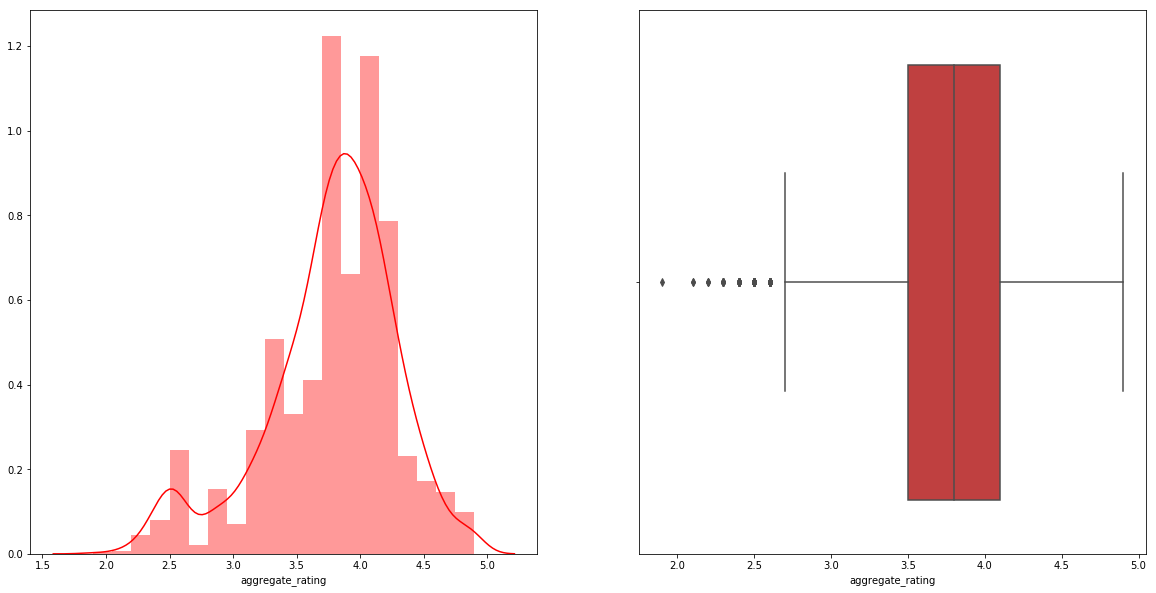

In [12]:
zch_rat = zch[zch.aggregate_rating != 0]
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.distplot(zch_rat.aggregate_rating,bins=20,kde=True,color='r',ax=ax[0])
sns.boxplot(zch_rat.aggregate_rating,ax=ax[1],color='r',saturation=0.5)

* Half of the cities restaurants have ratings in the range of 3.5 and 4, with the median rating at the high 3.75. Thus restaurants with ratings above 4 should only be considered as the best restaurants by rating. 
* There seem to be quite a few restaurants with rating less than 2.5 as outliers, which could be due to lack of sufficient number of ratings.

**Cuisine:**

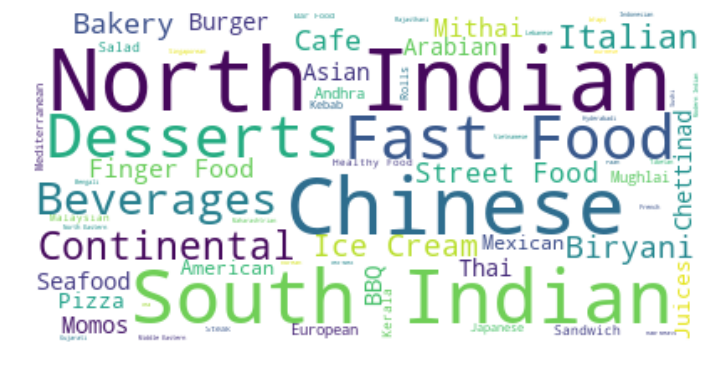

In [13]:
lis = []
for i in range(0,zch.shape[0]):
    for j in zch.iloc[i,4]:
        lis.append(j)
for k in range(0,len(lis)):
    lis[k] = lis[k].strip()
    
from collections import Counter
cuisine_count = Counter(lis)

from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(cuisine_count)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

* Restaurants in the city serve variety of cuisines from chettinad to continental. 
<br>
* Of all, North Indian, South Indian and Chinese form the top 3 cusines served in the city.

# Delving Deep into the Top 20 Localities

After the general understanding of the restaurant space in Chennai, we will dig the top 20 localities deeper so as to make the foodies' choice easier.

(0.0, 100.0, 0.0, 100.0)

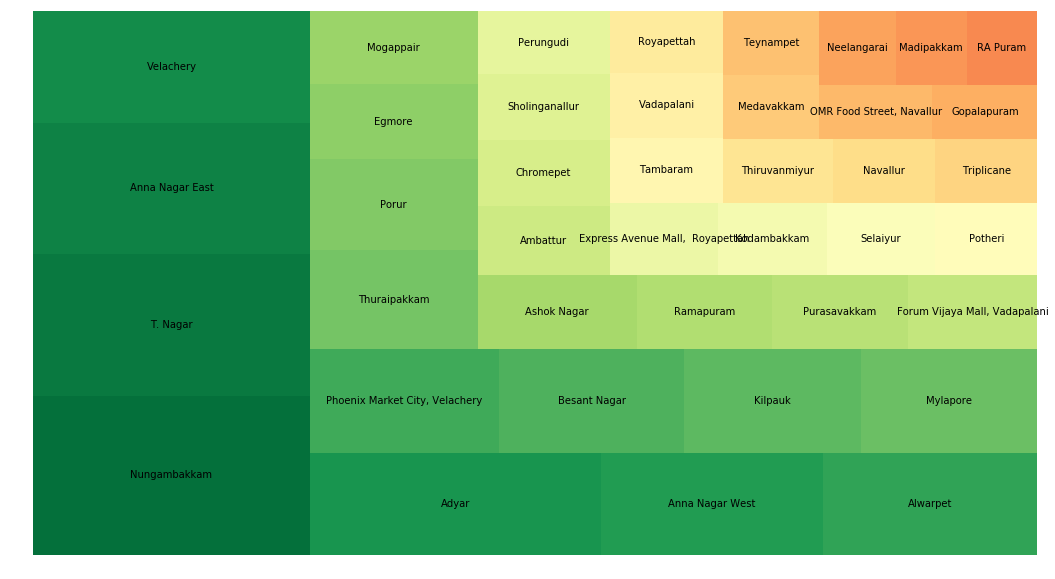

In [14]:
import squarify
plt.figure(figsize=(18,10))
squarify.plot(sizes=zch.locality.value_counts().head(40),label=zch.locality.value_counts().head(40).index,
              color=sns.color_palette('RdYlGn_r',52))
plt.axis('off')

**Restaurant type by locality and price:**

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


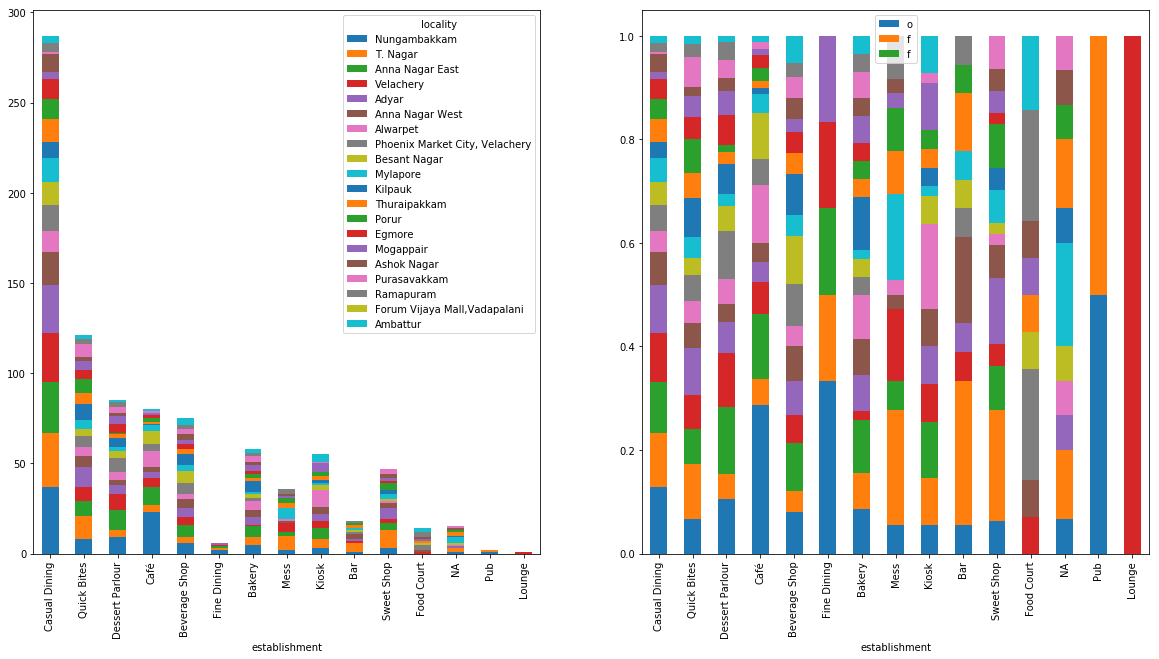

In [15]:
rd = pd.crosstab(zch.locality,zch.establishment).loc[['Nungambakkam', 'T. Nagar', 'Anna Nagar East', 'Velachery', 
       'Adyar','Anna Nagar West', 'Alwarpet', 'Phoenix Market City, Velachery','Besant Nagar', 'Mylapore','Kilpauk', 
       'Thuraipakkam', 'Porur','Egmore', 'Mogappair', 'Ashok Nagar', 'Purasavakkam', 'Ramapuram',
       'Forum Vijaya Mall,Vadapalani', 'Ambattur'],[ 'Casual Dining', 'Quick Bites', 'Dessert Parlour', 'Café',
       'Beverage Shop', 'Fine Dining', 'Bakery', 'Mess', 'Kiosk', 'Bar','Sweet Shop', 'Food Court', 'NA', 'Pub', 
       'Lounge']].T
f,ax=plt.subplots(1,2,figsize=(20,10))
rd.plot(kind='bar',stacked=True,ax=ax[0],)
ax = (rd.div(rd.sum(1), axis=0).plot(kind='bar',stacked=True,ax=ax[1]))
ax.legend('off')

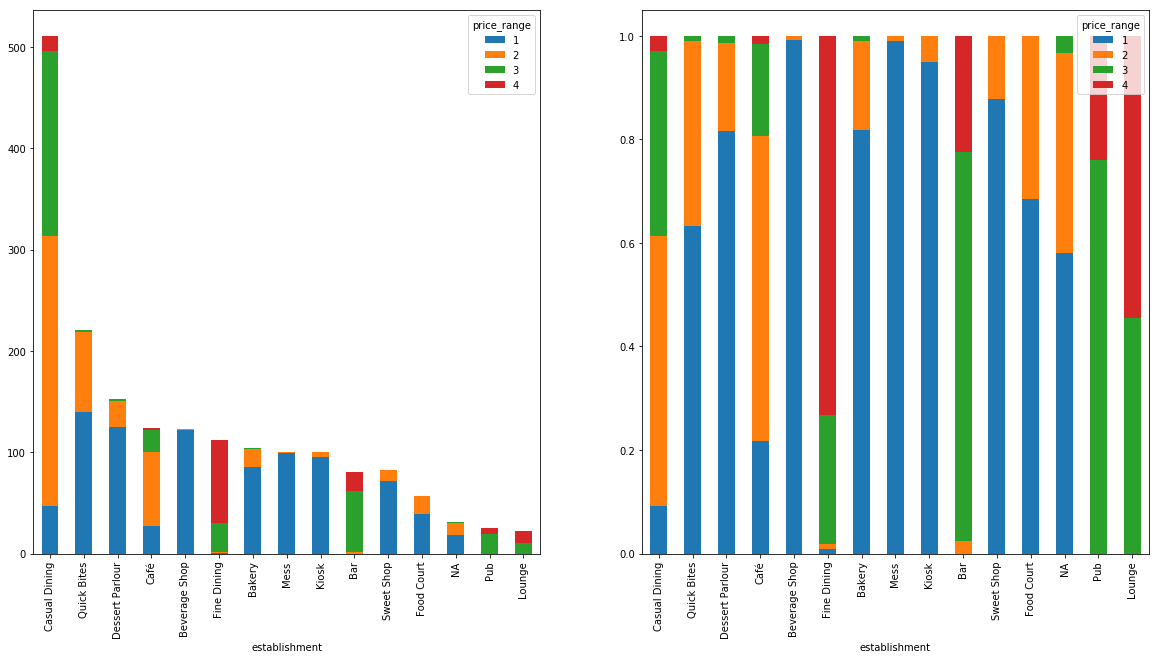

In [16]:
tp = pd.crosstab(zch.establishment,zch.price_range).loc[[ 'Casual Dining', 'Quick Bites', 'Dessert Parlour', 'Café',
       'Beverage Shop', 'Fine Dining', 'Bakery', 'Mess', 'Kiosk', 'Bar','Sweet Shop', 'Food Court', 'NA', 'Pub', 
       'Lounge'],:]
f,ax=plt.subplots(1,2,figsize=(20,10))
tp.plot(kind='bar',stacked=True,ax=ax[0],)
ax = (tp.div(tp.sum(1), axis=0).plot(kind='bar',stacked=True,ax=ax[1]))

* Casual dining represents the vast majority of restaurants and are spread out evenly throughout the city, which are mostly in the medium and high price range.
<br>
* As expected, quick dining, mess, beverage shop and kiosks are predominately low priced. 
<br>
* Nungambakkam,Alwarpet,Anna Nagar East and Besant Nagar are the go-to places in the city to chill the evening in a cafe and most cafes of the city don't burn a hole in the pocket with prices rarely in very high range.
<br>
* A special occassion such as a birthday date or anniversary, warrants a fine dining experience. Nungambakkam, T Nagar, Velachery, Adyar and Anna Nagar East turns out to house those fine dining places in the city. Do mind, it could be an expensive night with prices in very high range.
<br>
* Go to places to spend friday nights aka booze spots are T Nagar, Anna Nagar West and Thuraipakkam along with Besant Nagar, Phoenix Mall and Mylapore. Most of them are in high to very high price range

**Price Range in Top 20:**

Text(0, 0.5, 'Median cost for two')

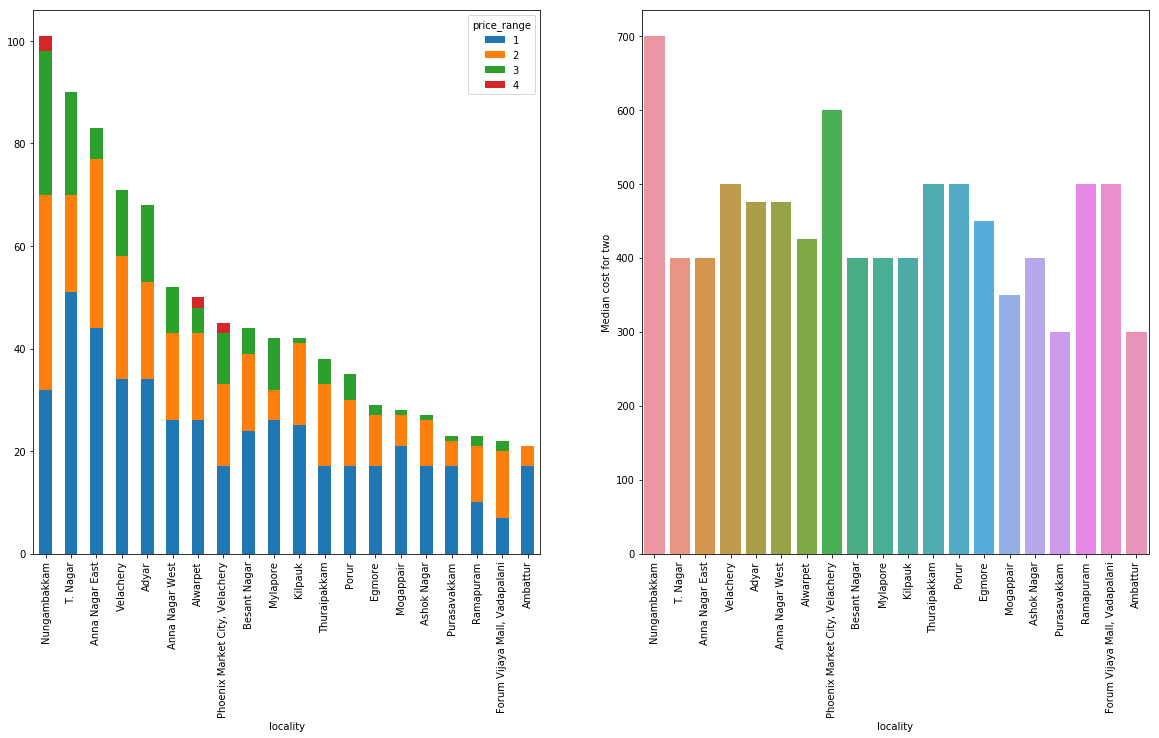

In [17]:
rp = pd.crosstab(zch.locality,zch.price_range).loc[['Nungambakkam', 'T. Nagar', 'Anna Nagar East', 'Velachery', 
       'Adyar','Anna Nagar West', 'Alwarpet', 'Phoenix Market City, Velachery','Besant Nagar', 'Mylapore', 
       'Kilpauk', 'Thuraipakkam', 'Porur','Egmore', 'Mogappair', 'Ashok Nagar', 'Purasavakkam', 'Ramapuram',
       'Forum Vijaya Mall, Vadapalani', 'Ambattur']]
f,ax=plt.subplots(1,2,figsize=(20,10))
rp.plot(kind='bar',stacked=True,ax=ax[0],)
cost_loc = zch.groupby('locality')['average_cost_for_two'].median().reset_index().set_index('locality').loc[['Nungambakkam', 
        'T. Nagar', 'Anna Nagar East', 'Velachery', 'Adyar',
       'Anna Nagar West', 'Alwarpet', 'Phoenix Market City, Velachery',
       'Besant Nagar', 'Mylapore', 'Kilpauk', 'Thuraipakkam', 'Porur',
       'Egmore', 'Mogappair', 'Ashok Nagar', 'Purasavakkam', 'Ramapuram',
       'Forum Vijaya Mall, Vadapalani', 'Ambattur']]
sns.barplot(x=cost_loc.index,y=cost_loc.average_cost_for_two,ax=ax[1])
plt.xticks(rotation='vertical')
plt.ylabel('Median cost for two')

* Of all, Nungambakkam and Phoenix Market City stand out with a high median cost for two of 700 and 600 respectively, becoming the costliest neighbourhood in terms of restaurants in Chennai.
<br>
* This is followed by Anna Nagar West, Adyar, Velachery, Thuraipakkam and Egmore, forming the next Tier.

# Understanding the ratings

Rating of the restaurants play a vital role in determining the choice of the customer. Relationship between various factors and ratings will be analysed further.

**Locality:**

Text(0, 0.5, 'Median rating')

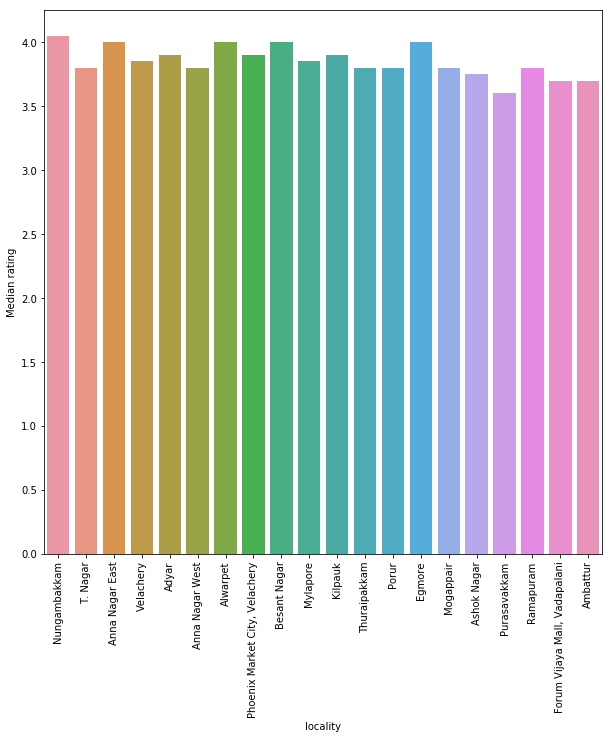

In [18]:
rat_loc = zch_rat.groupby('locality')['aggregate_rating'].median().reset_index().set_index('locality').loc[['Nungambakkam', 'T. Nagar', 'Anna Nagar East', 'Velachery', 'Adyar',
       'Anna Nagar West', 'Alwarpet', 'Phoenix Market City, Velachery',
       'Besant Nagar', 'Mylapore', 'Kilpauk', 'Thuraipakkam', 'Porur',
       'Egmore', 'Mogappair', 'Ashok Nagar', 'Purasavakkam', 'Ramapuram',
       'Forum Vijaya Mall, Vadapalani', 'Ambattur']]
plt.figure(figsize=(10,10))
sns.barplot(x=rat_loc.index,y=rat_loc.aggregate_rating)
plt.xticks(rotation='vertical')
plt.ylabel('Median rating')

* Median rating of the top 20 localities seem to be almost the same and only. Hence the localities could be taken as the parameter to understand the ratings.

**Price Range:**

([<matplotlib.axis.XTick at 0x7f0c44ab2400>,
 <a list of 4 Text xticklabel objects>)

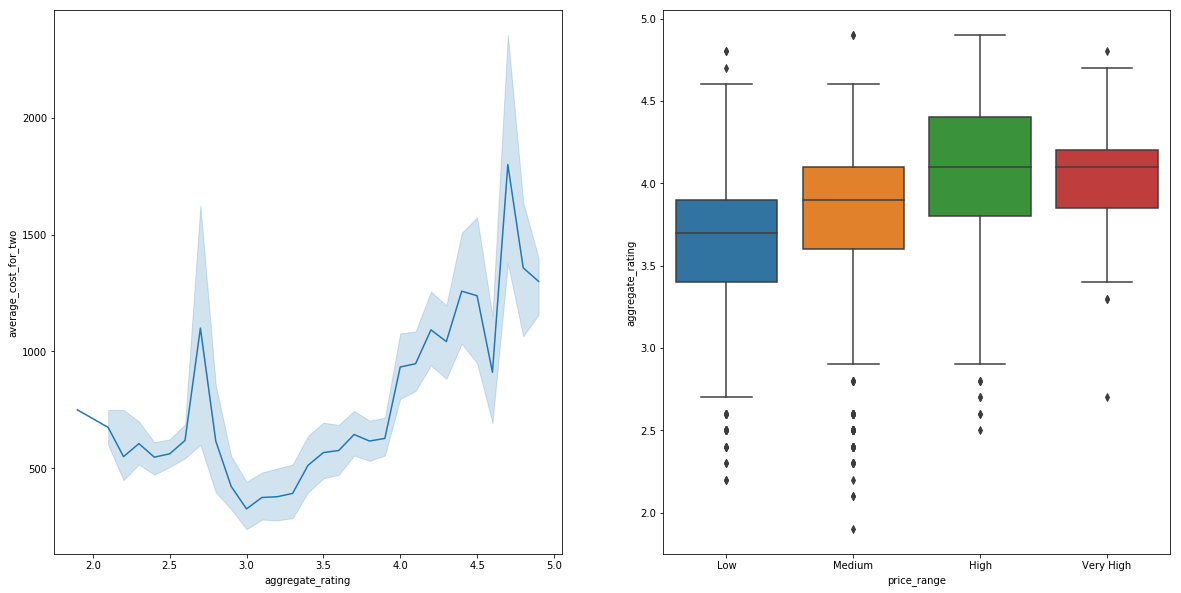

In [19]:
zch_rat = zch[zch.aggregate_rating != 0]
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='price_range',y='aggregate_rating',data=zch_rat,ax=ax[1])
sns.lineplot(x=zch_rat.aggregate_rating,y=zch_rat.average_cost_for_two,ax=ax[0])
plt.xticks(ticks=(0,1,2,3),labels=('Low','Medium','High','Very High'))

* There is a linear relation between rating and cost for two, between 3.0 and 4.5. This means at this range, higher the cost of the restaurant, it has higher odds for a better rating.
* Box plot also validates this, with the median rating of restaurants increase from low to high priced ones. But there is a stagnation between high and very high priced.
* High priced restaurants have the largest number of restaurants with above median ratings.

**Restaurant type:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

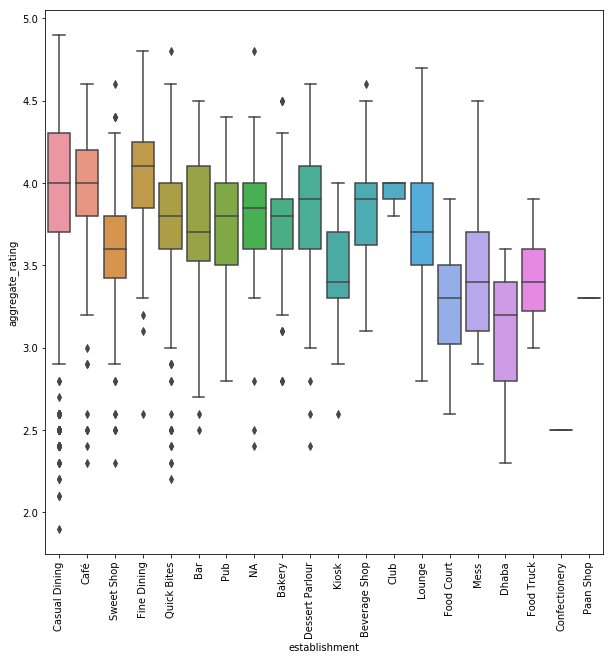

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='establishment',y='aggregate_rating',data=zch_rat)
plt.xticks(rotation='vertical')

* Casual dining, cafe and fine dining all share the same median rating. But casual dining have a larger variance whereas cafes and fine dining restaurants have relatively smaller variance

# Conclusion

This kernel is an attempt to understand the restaurant space of the city. I hope it has tried to justice to it and you liked the notebook. Yet a lot of newer insights still can be gained on further exploration of the data, the kernel will be updated in the future of that.
<bd>
Being my first attempt at EDA, I would appreciate any suggestions or comments from the community.